# Machine Learning Foundations - A Case Study Approach
Week 1 - Demonstration

Donny van der Meer

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
sales = pd.read_csv("../data/home_data.csv")

In [3]:
sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
sales.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The import into pandas looks correct, but the date is not formatted correctly and the zipcode is interpreted as a number rather than a category. Let's fix this.

In [5]:
sales['date'] = pd.to_datetime(sales['date'])
sales['zipcode'] = sales['zipcode'].astype('category')

In [6]:
sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
len(sales)

21613

## Exploring the data for housing sales

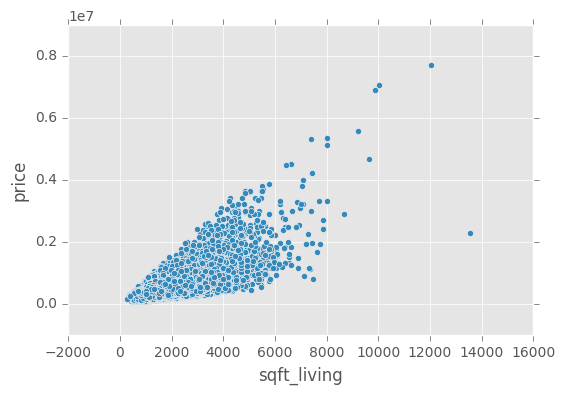

In [8]:
sales.plot(kind = 'scatter', x='sqft_living', y='price')

## Create simple regression model of size_sqft to price

In [9]:
# Use the train_test_split function from scikit-learn (imported on the top)
# Here we have to give the size of the test (instead of the size of 
# the train data in the lecture). random_state is the seed
train_data, test_data = train_test_split(sales, test_size=0.2, random_state=42)

In [10]:
print(len(train_data), len(test_data))

17290 4323


## Build the regression model

In [11]:
sqft_model = linear_model.LinearRegression()
train_X = np.reshape(train_data['sqft_living'], (-1, 1)) # reshape required for sklearn
train_Y = train_data['price']
sqft_model.fit(X = train_X, y = train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the simple model

In [12]:
print(test_data['price'].mean())

549367.4450613001


In [13]:
# Define a helper function to assess model performance
def evaluate(model, test_x, test_y):
    errors = model.predict(test_x) - test_y
    return {'rmse': sqrt(np.mean(errors ** 2)), 'max_error' : errors.max()}

In [14]:
test_X = np.reshape(test_data['sqft_living'], (-1, 1))
test_Y = test_data['price']
evaluate(sqft_model, test_X, test_Y)

{'max_error': 1463172.5164757892, 'rmse': 276559.1755751057}

## Let's show what our predictions look like

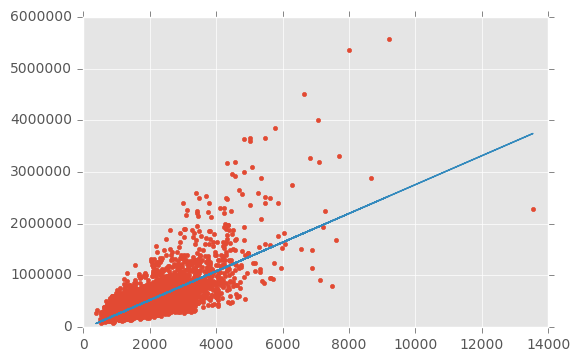

In [15]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
        test_data['sqft_living'], sqft_model.predict(test_X), '-')

In [16]:
print(sqft_model.coef_[0], sqft_model.intercept_)

279.554778509 -41999.1845423


## Explore other features in the data

In [17]:
sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [19]:
sales[my_features].describe(include = 'all')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.0
unique,NaN,NaN,NaN,NaN,NaN,70.0
top,NaN,NaN,NaN,NaN,NaN,98103.0
freq,NaN,NaN,NaN,NaN,NaN,602.0
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116550550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112a10908>]], dtype=object)

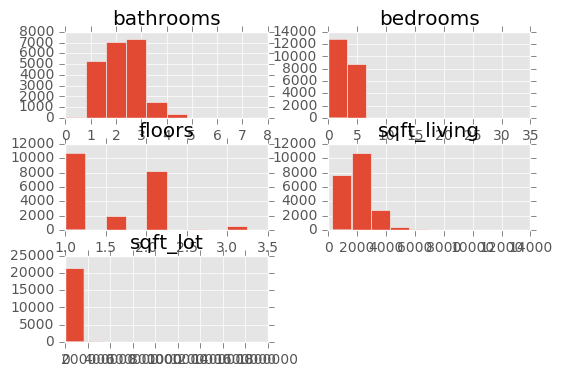

In [20]:
sales[my_features].hist()

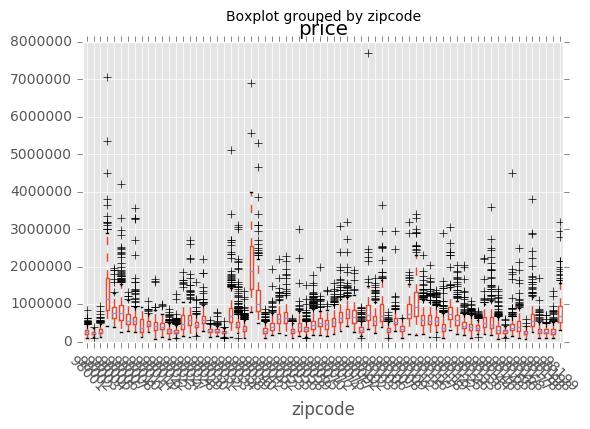

In [21]:
sales.boxplot(column='price', by='zipcode', rot=-45)

## Build a regression model with more features

In [22]:
train_with_dummies = pd.get_dummies(train_data[my_features])
test_with_dummies = pd.get_dummies(test_data[my_features])
train_with_dummies.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6325,3,1.75,1780,13095,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13473,2,1.00,1000,3700,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,3,1.00,1080,7486,1.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16970,3,2.25,2090,7500,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20868,2,2.50,1741,1439,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
my_features_model = linear_model.LinearRegression()
my_features_model.fit(X = train_with_dummies, y = train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print(evaluate(sqft_model, test_X, test_Y))
print(evaluate(my_features_model, test_with_dummies, test_Y))

{'rmse': 276559.1755751057, 'max_error': 1463172.5164757892}
{'rmse': 201126.56893762105, 'max_error': 1314281.1549072266}


## Apply learned models to predict prices of 3 houses

In [25]:
house1 = sales.loc[sales['id'] == 5309101200]

In [26]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [27]:
print(house1.price)

1054    620000
Name: price, dtype: int64


In [28]:
# Prediction from the sqft_model (with some reshaping to prevent errors)
sqft_model.predict(np.reshape(house1['sqft_living'],(-1,1)))

array([ 628932.28388041])

In [29]:
# Prediction from my_features_model (with zipcode converted to dummy)
my_features_model.predict(pd.get_dummies(house1[my_features]))

array([ 726691.41345215])

## Prediction for a second, fancier house

In [30]:
house2 = sales.loc[sales['id'] == 1925069082]

In [31]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,2015-05-11,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [32]:
sqft_model.predict(np.reshape(house2['sqft_living'],(-1,1)))

array([ 1255134.9877416])

In [33]:
my_features_model.predict(pd.get_dummies(house2[my_features]))

array([ 1228879.93029785])

## Last house, super fancy

In [34]:
bill_gates = house2.copy()

In [35]:
bill_gates['bedrooms'] = 8
bill_gates['bathrooms'] = 25
bill_gates['sqft_living'] = 50000
bill_gates['sqft_lot'] = 225000
bill_gates['floors'] = 4
bill_gates.loc[:,'zipcode'] = 98039

In [36]:
bill_gates['zipcode']

1361    98039
Name: zipcode, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [37]:
sqft_model.predict(np.reshape(bill_gates['sqft_living'], (-1,1)))

array([ 13935739.74093069])

In [38]:
my_features_model.predict(pd.get_dummies(bill_gates[my_features]))

array([ 14757400.28747559])